# Multiclass Classification using Tensorflow

The most popular use case for TensorFlow's multiclass classification is the Minst dataset. While I have learned on it as a first step, I was excited to apply Tensorflow to classify another dataset. I obtained this glass classification dataset from UCI website: https://archive.ics.uci.edu/ml/datasets/ It only has 200 samples and I didnt get a good accuracy but this was a good dataset for dimensionality reduction and just another practice round for Tensorflow.

In [233]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [234]:
#Input data to Test/Train datasets
X = pd.read_csv('glass.csv')
X.columns = ['Id', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','label']

X_train = X.drop(['label','Id'], axis='columns', inplace=False)
y_train = X['label']

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_train=onehot_encoded

inputX, testX, inputY, testY = train_test_split(X_train, y_train, test_size=0.08, random_state=4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [235]:
#Reshape data for training
inputX=np.array(inputX).reshape((-1,9))
inputX
inputY=np.array(inputY).reshape((-1,6))

In [239]:
#Softmax Classification

#Define Parameters
n_inputs=9
n_hidden=2
n_outputs=6
learning_rate=0.01

training_epochs=45
codings=hidden
batch_size=7
n_samples=len(inputX)
display_step = 1

#Define Network
x=tf.placeholder(tf.float32,shape=[None,n_inputs])
y=tf.placeholder(tf.int32,shape=(None,n_outputs))
hidden=tf.layers.dense(x,n_hidden)
logits=tf.layers.dense(hidden,n_outputs)
y_ = tf.placeholder(tf.float32, [None, 6])

In [241]:
#Loss
xentropy=tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits)
loss=tf.reduce_mean(xentropy,name="loss")

#Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
training_op=optimizer.minimize(loss)

#Accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(logits,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [242]:
#Training the network
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    acc_t=[]
    acc_v=[]
    epoch_l=[]
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([training_op], feed_dict={x: batch_x, y:batch_y})
            
            acc_train=accuracy.eval(feed_dict={x: batch_x, y:batch_y})
            acc_val=accuracy.eval(feed_dict={x: testX, y:testY})
            
        epoch_l.append(epoch)
        acc_t.append(acc_train)
        acc_v.append(acc_val)
        print(epoch,"trainaccuracy: ",acc_train,"valaccuracy: ",acc_val)
            

0 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
1 trainaccuracy:  0.2857143 valaccuracy:  0.2777778
2 trainaccuracy:  0.2857143 valaccuracy:  0.2777778
3 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
4 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
5 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
6 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
7 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
8 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
9 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
10 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
11 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
12 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
13 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
14 trainaccuracy:  0.5714286 valaccuracy:  0.44444445
15 trainaccuracy:  0.42857143 valaccuracy:  0.3888889
16 trainaccuracy:  0.2857143 valaccuracy:  0.3888889
17 trainaccuracy:  0.2857143 valaccuracy:  0.3888889
18 trainaccuracy:  0.42857143 valaccuracy:

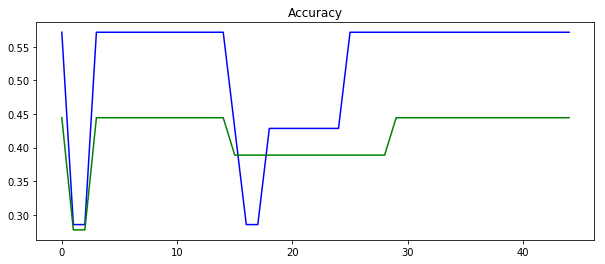

In [245]:
# Plot the accuracy summary 
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(10,4))
ax1.plot(epoch_l,acc_t, color='b') # blue
ax1.plot(epoch_l,acc_v, color='g') # green
ax1.set_title('Accuracy')
plt.show()
